In [ ]:
# Importing Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Downloading the dataset
!rm -rf /cic && git clone https://github.com/lifesboy/selks-lstm-data.git /cic
!mkdir -p /cic/dataset/ecg && wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip -P /cic/dataset/

Cloning into '/cic'...
remote: Enumerating objects: 393, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 393 (delta 4), reused 19 (delta 4), pack-reused 372
Receiving objects: 100% (393/393), 366.29 MiB | 39.39 MiB/s, done.
Resolving deltas: 100% (159/159), done.
--2022-12-29 16:42:44--  http://www.timeseriesclassification.com/Downloads/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 109.123.71.232
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|109.123.71.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10614407 (10M) [application/zip]
Saving to: ‘/cic/dataset/ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  12.9MB/s    in 0.8s    

2022-12-29 16:42:45 (12.9 MB/s) - ‘/cic/dataset/ECG5000.zip’ saved [10614407/10614407]



In [ ]:
# Unzipping the datasset
!unzip /cic/dataset/ECG5000.zip -d /cic/dataset/ecg/

!unzip /cic/dataset/feature_extracted/nsm/ftp-bruteforce-forward-https/log.1.1671446607.pcap_20221229T161624.csv.zip -d /cic/dataset/feature_extracted/nsm/ftp-bruteforce-forward-https/
!rm -rf /cic/dataset/feature_extracted/nsm/ftp-bruteforce-forward-https/log.1.1671446607.pcap_20221229T161624.csv.zip

Archive:  /cic/dataset/ECG5000.zip
  inflating: /cic/dataset/ecg/ECG5000.txt  
  inflating: /cic/dataset/ecg/ECG5000_TEST.arff  
  inflating: /cic/dataset/ecg/ECG5000_TEST.txt  
  inflating: /cic/dataset/ecg/ECG5000_TRAIN.arff  
  inflating: /cic/dataset/ecg/ECG5000_TRAIN.txt  
  inflating: /cic/dataset/ecg/ECG5000_TEST.ts  
  inflating: /cic/dataset/ecg/ECG5000_TRAIN.ts  
Archive:  /cic/dataset/feature_extracted/nsm/ftp-bruteforce-forward-https/log.1.1671446607.pcap_20221229T161624.csv.zip
  inflating: /cic/dataset/feature_extracted/nsm/ftp-bruteforce-forward-https/log.1.1671446607.pcap_20221229T161624.csv  


In [ ]:
# Concatenating the train and test file into a single file named 'ecg_final.txt'
!cat /cic/dataset/ecg/ECG5000_TRAIN.txt /cic/dataset/ecg/ECG5000_TEST.txt > /cic/dataset/ecg/ecg_final.txt

In [ ]:
# Displaying the head of the file
!head /cic/dataset/ecg/ecg_final.txt
!head /cic/dataset/feature_extracted/nsm/ftp-bruteforce-forward-https/log.1.1671446607.pcap_20221229T161624.csv

   1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.282

In [ ]:
# Importing the finla file in pandas dataframe
df = pd.read_csv('/cic/dataset/ecg/ecg_final.txt', sep = '  ', header = None)
L_df = pd.read_csv('/cic/dataset/feature_extracted/nsm/ftp-bruteforce-forward-https/log.1.1671446607.pcap_20221229T161624.csv')
L_df['label'] = L_df.apply(lambda x: 1 if x['src_ip'] == '192.168.66.39' else 0, axis=1)
features = ['label',# 'ack_flag_cnt', 'active_max', 'active_mean', 'active_min', 'active_std', 'bwd_blk_rate_avg', 'bwd_byts_b_avg', 'bwd_header_len', 'bwd_iat_max', 'bwd_iat_mean', 'bwd_iat_min', 'bwd_iat_std', 'bwd_iat_tot', 'bwd_pkt_len_max', 'bwd_pkt_len_mean', 'bwd_pkt_len_min', 'bwd_pkt_len_std', 'bwd_pkts_b_avg', 'bwd_pkts_s', 'bwd_psh_flags', 'bwd_seg_size_avg', 'bwd_urg_flags', 'cwe_flag_count', 'down_up_ratio', 'dst_port', 'ece_flag_cnt', 'fin_flag_cnt', 'flow_byts_s', 'flow_duration', 'flow_iat_max', 'flow_iat_mean', 'flow_iat_min', 'flow_iat_std', 'flow_pkts_s', 'fwd_act_data_pkts', 'fwd_blk_rate_avg', 'fwd_byts_b_avg', 'fwd_header_len', 'fwd_iat_max', 'fwd_iat_mean', 'fwd_iat_min', 'fwd_iat_std', 'fwd_iat_tot', 'fwd_pkt_len_max', 'fwd_pkt_len_mean', 'fwd_pkt_len_min', 'fwd_pkt_len_std', 'fwd_pkts_b_avg', 'fwd_pkts_s', 'fwd_psh_flags', 'fwd_seg_size_avg', 'fwd_seg_size_min', 'fwd_urg_flags', 'idle_max', 'idle_mean', 'idle_min', 'idle_std', 'init_bwd_win_byts', 'init_fwd_win_byts', 'pkt_len_max', 'pkt_len_mean', 'pkt_len_min', 'pkt_len_std', 'pkt_len_var', 'pkt_size_avg', 'protocol', 'psh_flag_cnt', 'rst_flag_cnt', 'src_port', 'subflow_bwd_byts', 'subflow_bwd_pkts', 'subflow_fwd_byts', 'subflow_fwd_pkts', 'syn_flag_cnt', 'tot_bwd_pkts', 'tot_fwd_pkts', 'totlen_bwd_pkts', 'totlen_fwd_pkts', 'urg_flag_cnt',
            *['p%s' % i for i in range(0, 256)]]
L_df = L_df[features]

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
print('df=', df.shape)
df.head()

df= (5000, 141)


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [ ]:
print('L_df=', L_df.shape)
L_df.head()

L_df= (77084, 257)


,label,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p246,p247,p248,p249,p250,p251,p252,p253,p254,p255
0,0,117,115,101,114,45,97,103,101,110,...,112,116,45,101,110,99,111,100,105,110
1,0,92,34,61,62,92,34,49,46,49,...,62,92,34,58,112,97,116,104,92,34
2,0,192,37,255,236,3,19,124,118,76,...,3,250,16,215,68,138,111,205,86,221
3,0,123,34,105,110,100,101,120,34,58,...,54,46,49,56,48,58,54,51,55,57
4,0,69,76,75,83,92,34,125,44,32,...,114,118,105,99,101,95,112,111,114,116


In [ ]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [ ]:
L_df.columns

Index(['label', 'p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8',
       ...
       'p246', 'p247', 'p248', 'p249', 'p250', 'p251', 'p252', 'p253', 'p254',
       'p255'],
      dtype='object', length=257)

In [ ]:
# Adding prefix to column names so that we can easily reference them
# Original file did not contain column names so pandas creates numeric column names automatically that cannot be referenced easily 
df = df.add_prefix('c')
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [ ]:
L_df.columns = range(L_df.shape[1])
L_df = L_df.add_prefix('c')
L_df.columns
df = L_df

In [ ]:
# Counting the data points of diffrent labels 
df['c0'].value_counts()

0    75512
1     1572
Name: c0, dtype: int64

In [ ]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c247,c248,c249,c250,c251,c252,c253,c254,c255,c256
count,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,...,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000,77084.000000
mean,0.020393,60.051411,54.307145,48.090538,48.220111,65.160695,75.646619,75.785001,76.633880,78.935784,...,54.476766,54.248871,54.234614,54.444813,54.347219,54.581560,54.471291,53.961769,54.451624,54.167181
std,0.141343,73.718460,77.109639,72.665469,73.024539,75.864014,83.141785,82.986139,83.293418,84.326658,...,78.825314,78.723403,78.737122,78.998240,78.975093,79.162006,78.986473,78.505869,78.894498,78.891917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,23.000000,3.000000,3.000000,0.000000,32.000000,45.000000,46.000000,46.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,96.000000,98.000000,87.000000,88.000000,113.000000,143.000000,141.000000,146.000000,149.000000,...,105.000000,103.000000,104.000000,105.000000,105.000000,106.000000,105.000000,103.000000,106.000000,104.000000
max,1.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
# splitting into train test data
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:, 0:1], test_size = 0.2, random_state = 111)


In [ ]:
# Initializing a MinMax Scaler
scaler = MinMaxScaler()

# Fitting the train data to the scaler
data_scaled = scaler.fit(train_data)

In [ ]:
# Scaling dataset according to weights of train data
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [ ]:
train_data.shape

(61667, 257)

In [ ]:
# Making pandas dataframe for the normal and anomaly train data points
normal_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

In [ ]:
anomaly_train_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.3254902 , 0.27058824, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.3254902 , 0.27058824, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31372549, 0.25490196, 0.3254902 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Making pandas dataframe for the normal and anomaly test data points
normal_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:, 1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:, 1:]

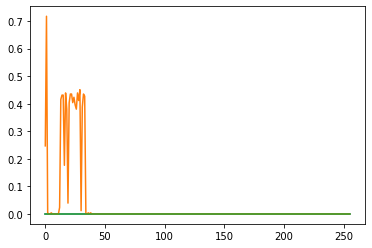

In [ ]:
# plotting the first three normal data points
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

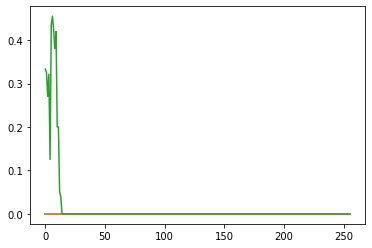

In [ ]:
# plotting the first three anomaly data points
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [ ]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = Sequential([
                                Dense(64, activation='relu'),
                                Dense(32, activation='relu'),
                                Dense(16, activation='relu'),
                                Dense(8, activation='relu')
    ])

    self.decoder = Sequential([
                               Dense(16, activation='relu'),
                               Dense(32, activation='relu'),
                               Dense(64, activation='relu'),
                               Dense(df.shape[1] - 1, activation='sigmoid')
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
# Instantiating the Autoencoder
model = Autoencoder()

# creating an early_stopping
early_stopping = EarlyStopping(monitor='val_loss',
                               patience = 2,
                               mode = 'min')

# Compiling the model
model.compile(optimizer = 'adam',
              loss = 'mae')

In [ ]:
# Training the model
history = model.fit(normal_train_data,normal_train_data,
                    epochs = 50,
                    batch_size = 120,
                    validation_data = (train_data_scaled[:,1:], train_data_scaled[:,1:]),
                    shuffle = True,
                    callbacks = [early_stopping])

Epoch 1/50
504/504 [==============================] - 3s 4ms/step - loss: 0.1650 - val_loss: 0.1332
Epoch 2/50
504/504 [==============================] - 2s 4ms/step - loss: 0.1342 - val_loss: 0.1306
Epoch 3/50
504/504 [==============================] - 3s 5ms/step - loss: 0.1327 - val_loss: 0.1297
Epoch 4/50
504/504 [==============================] - 3s 6ms/step - loss: 0.1320 - val_loss: 0.1292
Epoch 5/50
504/504 [==============================] - 3s 7ms/step - loss: 0.1315 - val_loss: 0.1287
Epoch 6/50
504/504 [==============================] - 2s 4ms/step - loss: 0.1311 - val_loss: 0.1283
Epoch 7/50
504/504 [==============================] - 2s 4ms/step - loss: 0.1308 - val_loss: 0.1281
Epoch 8/50
504/504 [==============================] - 3s 5ms/step - loss: 0.1305 - val_loss: 0.1279
Epoch 9/50
504/504 [==============================] - 3s 5ms/step - loss: 0.1303 - val_loss: 0.1276
Epoch 10/50
504/504 [==============================] - 2s 4ms/step - loss: 0.1302 - val_loss: 0.1276

In [ ]:
# predictions for normal test data points
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [ ]:
encoder_out.shape

(15125, 8)

In [ ]:
decoder_out.shape

(15125, 256)

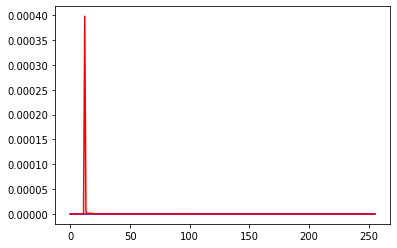

In [ ]:
# plotting normal test data point and its predictiction by the autoencoder
plt.plot(normal_test_data[0], 'b')
plt.plot(decoder_out[0], 'r')

In [ ]:
# predictions for anomaly test data points
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

anomaly_scores= [[0.00000000e+00 5.10731166e-36 0.00000000e+00 ... 2.82598582e-21
  5.90281893e-35 2.14037923e-29]
 [0.00000000e+00 5.10731166e-36 0.00000000e+00 ... 2.82598582e-21
  5.90281893e-35 2.14037923e-29]
 [0.00000000e+00 5.10731166e-36 0.00000000e+00 ... 2.82598582e-21
  5.90281893e-35 2.14037923e-29]
 ...
 [3.33333333e-01 3.25490196e-01 2.70588235e-01 ... 4.55521825e-15
  1.55489786e-23 4.95940014e-21]
 [0.00000000e+00 5.10731166e-36 0.00000000e+00 ... 2.82606135e-21
  5.90290904e-35 2.14041188e-29]
 [3.33333333e-01 3.25490196e-01 2.70588235e-01 ... 4.55520089e-15
  1.55489186e-23 4.95936217e-21]]


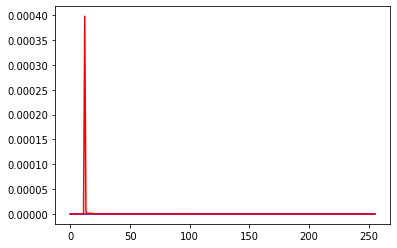

In [ ]:
# plotting anomaly test data point and its predictiction by the autoencoder
plt.plot(anomaly_test_data[0], 'b')
plt.plot(decoder_out_a[0], 'r')

anomaly_scores = np.abs(anomaly_test_data - decoder_out_a)
print('anomaly_scores=', anomaly_scores)

473/473 [==============================] - 1s 957us/step


(array([5524.,  608., 1018.,  469.,  361.,  264.,  177.,  589., 5794.,
         321.]),
 array([1.59638644e-06, 2.93474271e-02, 5.86932579e-02, 8.80390887e-02,
        1.17384919e-01, 1.46730750e-01, 1.76076581e-01, 2.05422412e-01,
        2.34768242e-01, 2.64114073e-01, 2.93459904e-01]),
 <a list of 10 Patch objects>)

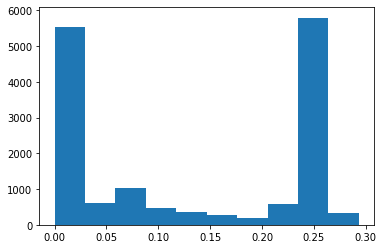

In [ ]:
# reconstruction loss for normal test data
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

# Plotting histogram for recontruction loss for normal test data
plt.hist(train_loss, bins = 10)

In [ ]:
np.mean(train_loss)

0.12971343725422002

In [ ]:
np.std(train_loss)

0.11229457767839095

10/10 [==============================] - 0s 1ms/step


(array([202.,  84.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([1.59638644e-06, 1.04155528e-02, 2.08295092e-02, 3.12434657e-02,
        4.16574221e-02, 5.20713785e-02, 6.24853349e-02, 7.28992913e-02,
        8.33132478e-02, 9.37272042e-02, 1.04141161e-01]),
 <a list of 10 Patch objects>)

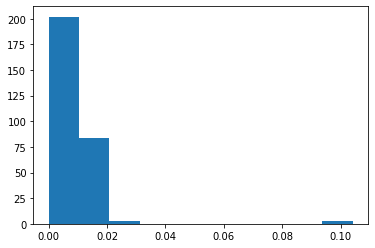

In [ ]:
# reconstruction loss for anomaly test data
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)

# Plotting histogram for recontruction loss for anomaly test data
plt.hist(train_loss_a, bins = 10)

In [ ]:
np.mean(train_loss_a)

0.005849101240648634

In [ ]:
np.std(train_loss_a)

0.012225434417017735

In [ ]:
# setting threshold
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [ ]:
threshold

0.35430259261100194

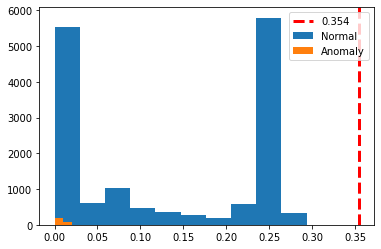

In [ ]:
# Plotting the normal and anomaly losses with the threshold
plt.hist(train_loss, bins = 10, label = 'Normal')
plt.hist(train_loss_a, bins = 10, label = 'Anomaly')
plt.axvline(threshold, color='r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(threshold))
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
# Number of correct predictions for Normal test data  
preds = tf.math.less(train_loss, threshold)

In [ ]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=15125>

In [ ]:
# Number of correct predictions for Anomaly test data 
preds_a = tf.math.greater(train_loss_a, threshold)

In [ ]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [ ]:
preds_a.shape

TensorShape([292])